In [ ]:
from google.colab import drive
drive.mount('/content/drive')


In [ ]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px
import nltk
import re
import string

from scipy.stats import norm
from wordcloud   import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob
import re
from collections import Counter

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from IPython.display import Markdown as md



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/GoogleColab/web social media anlysis and visualization/New_year_resolutions_data.csv', encoding='ISO-8859-1')


In [ ]:
df.head()

,resolution_topics,gender,name,Resolution_Category,retweet_count,text,tweet_created,tweet_date,tweet_id,tweet_location,tweet_state,tweet_region
0,Eat healthier,female,Dena_Marina,Health & Fitness,0.0,"#NewYearsResolution :: Read more books, No scr...",12/31/14 10:48,12/31/14,5.500000e+17,Southern California,CA,West
1,Humor about Personal Growth and Interests Reso...,female,ninjagirl325,Humor,1.0,#NewYearsResolution Finally master @ZJ10 's pa...,12/31/14 10:47,12/31/14,5.500000e+17,New Jersey,NJ,Northeast
2,Be More Confident,male,RickyDelReyy,Personal Growth,0.0,#NewYearsResolution to stop being so damn perf...,12/31/14 10:46,12/31/14,5.500000e+17,Hollywood,CA,West
3,Other,male,CalmareNJ,Philanthropic,0.0,My #NewYearsResolution is to help my disabled ...,12/31/14 10:45,12/31/14,5.500000e+17,Metro NYC,NY,Northeast
4,Be more positive,female,welovatoyoudemi,Personal Growth,0.0,#NewYearsResolution #2015Goals #2015bucketlist...,12/31/14 10:44,12/31/14,5.500000e+17,"Pittsburgh, Pennsylvania",PA,Northeast


In [ ]:
#Dtypes of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4821 entries, 0 to 4820
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   resolution_topics    4821 non-null   object 
 1   gender               4821 non-null   object 
 2   name                 4821 non-null   object 
 3   Resolution_Category  4821 non-null   object 
 4   retweet_count        2999 non-null   float64
 5   text                 4821 non-null   object 
 6   tweet_created        4821 non-null   object 
 7   tweet_date           4821 non-null   object 
 8   tweet_id             4821 non-null   float64
 9   tweet_location       4821 non-null   object 
 10  tweet_state          4821 non-null   object 
 11  tweet_region         4821 non-null   object 
dtypes: float64(2), object(10)
memory usage: 452.1+ KB


In [ ]:
#We would fill the retweet_column missing values systhetically using 0-15 random numbers
# Generate random integers for NaN values only
nan_indices = df['retweet_count'].isnull()  # Find indices where values are NaN
random_values = np.random.randint(0, 16, size=nan_indices.sum())  # Generate as many random integers as there are NaNs

# Fill NaN positions with the generated random integers
df.loc[nan_indices, 'retweet_count'] = random_values



In [ ]:
# Display the rows that had NaN values to check the new values
print(df.loc[nan_indices, 'retweet_count'])


2999    6.0
3000    9.0
3001    3.0
3002    1.0
3003    7.0
       ... 
4816    6.0
4817    0.0
4818    1.0
4819    2.0
4820    0.0
Name: retweet_count, Length: 1822, dtype: float64


In [ ]:
# Convert the 'tweet_created', 'tweet_date' columns to a datetime object.
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
df['tweet_date'] = pd.to_datetime(df['tweet_date'])


In [ ]:
#Description of the dataset
df.describe()

,retweet_count,tweet_created,tweet_date,tweet_id
count,4821.000000,4821,4821,4.821000e+03
mean,5.687617,2014-12-30 14:55:43.845675264,2014-12-30 02:46:22.327317760,5.500562e+17
min,0.000000,2014-12-21 16:11:00,2014-12-21 00:00:00,5.470000e+17
25%,0.000000,2014-12-29 16:00:00,2014-12-29 00:00:00,5.500000e+17
50%,1.000000,2014-12-31 11:56:00,2014-12-31 00:00:00,5.500000e+17
75%,6.000000,2015-01-01 08:03:00,2015-01-01 00:00:00,5.510000e+17
max,4234.000000,2015-01-02 09:54:00,2015-01-02 00:00:00,5.510000e+17
std,72.813266,NaN,NaN,9.536745e+14


In [ ]:
#Number of rows and columns in the dataset
print("There are {} rows and {} columns in the dataset.".format(df.shape[0],df.shape[1]))

There are 4821 rows and 12 columns in the dataset.


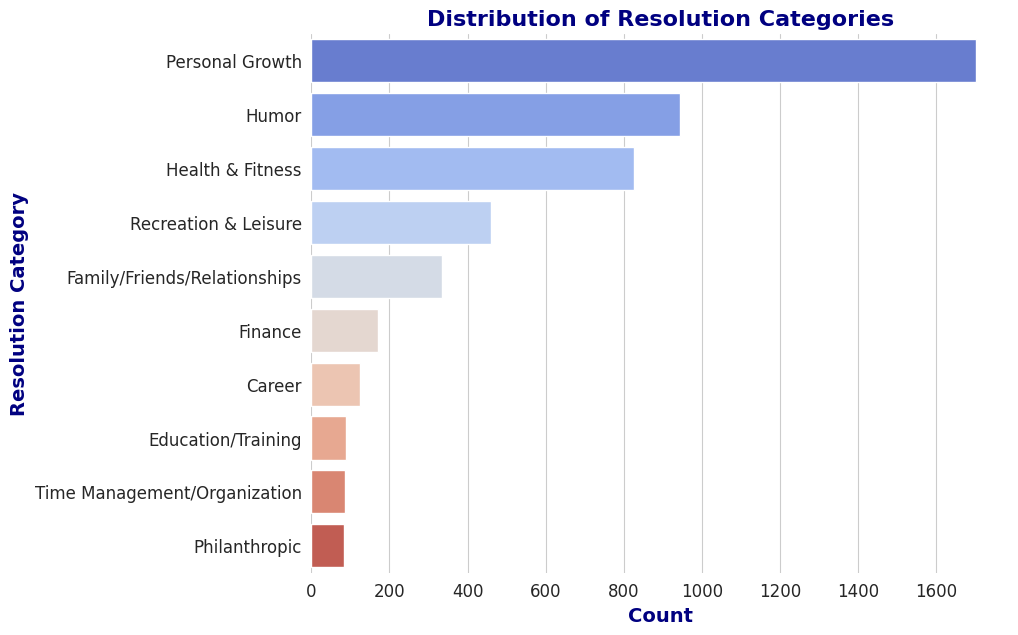

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a color palette
palette = sns.color_palette("coolwarm", n_colors=len(df['Resolution_Category'].value_counts()))

plt.figure(figsize=(9, 7))

# Create the count plot with the customized palette
sns.countplot(
    y='Resolution_Category',
    data=df,
    order=df['Resolution_Category'].value_counts().index,
    palette=palette
)

# Add title and labels with customized font sizes and styles
plt.title('Distribution of Resolution Categories', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Count', fontsize=14, fontweight='bold', color='navy')
plt.ylabel('Resolution Category', fontsize=14, fontweight='bold', color='navy')

# Customize tick parameters for better readability
plt.tick_params(axis='both', which='major', labelsize=12)

# Add a vertical grid to emphasize the counts, keep the axes uncluttered
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()


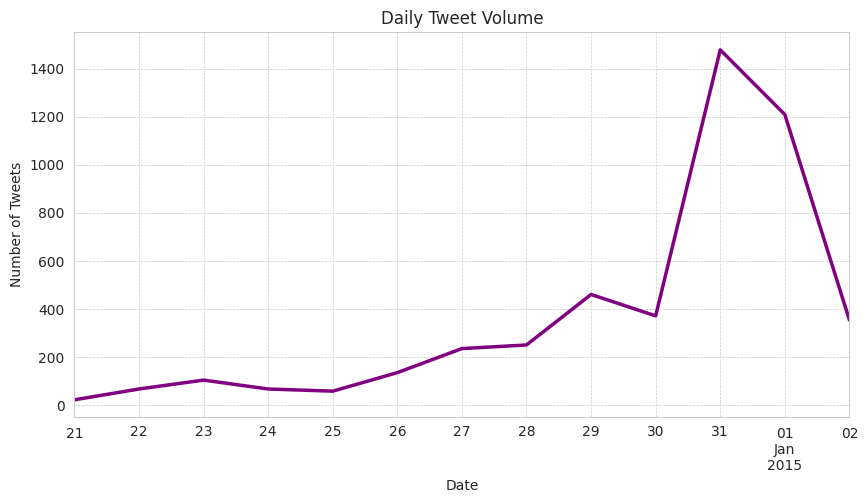

In [ ]:
df.set_index('tweet_date')['tweet_id'].resample('D').count().plot(figsize=(10, 5), linewidth=2.5, color='purple')
plt.title('Daily Tweet Volume')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()



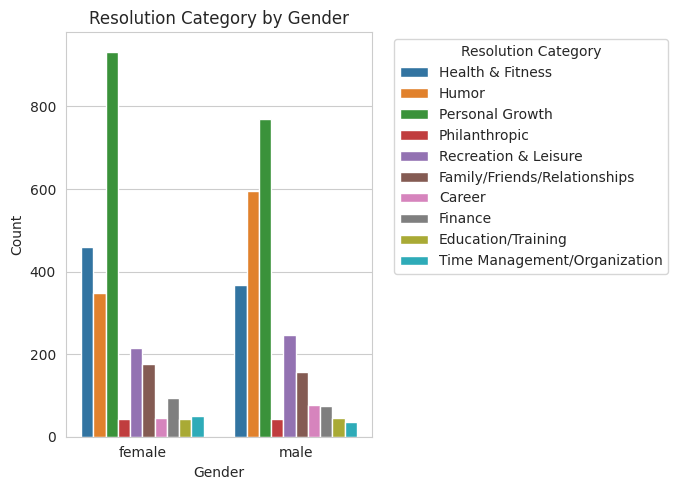

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(x='gender', hue='Resolution_Category', data=df)
plt.title('Resolution Category by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Resolution Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Group by 'Resolution_Category' and 'gender' and count the occurrences
category_gender_distribution = df.groupby(['Resolution_Category', 'gender']).size().reset_index(name='count')

# Pivot the data to have genders as columns and categories as rows
category_gender_pivot = category_gender_distribution.pivot(index='Resolution_Category', columns='gender', values='count').fillna(0)


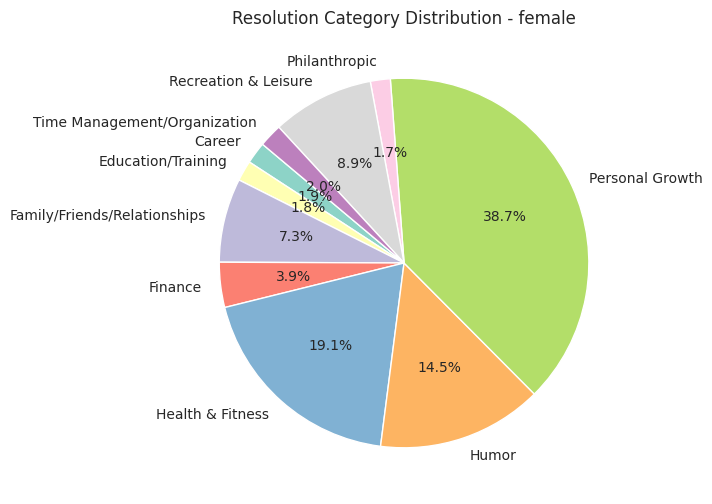

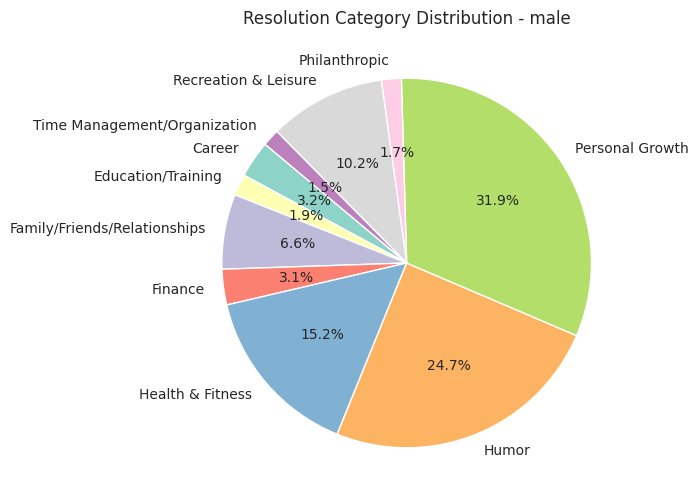

In [ ]:
import matplotlib.pyplot as plt

# Define a color palette
colors = plt.get_cmap('Set3').colors

# For each gender, create a pie chart
for gender in category_gender_pivot.columns:
    gender_data = category_gender_pivot[gender]
    plt.figure(figsize=(6, 6))
    plt.pie(gender_data, labels=gender_data.index, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title(f'Resolution Category Distribution - {gender}')
    plt.show()


In [ ]:
import folium
from folium.plugins import HeatMap

# Assuming df is your DataFrame with tweets data

# Your complete state_coords mapping
state_coords = {
    'AL': (32.3182, -86.9023),  # Alabama
    'AK': (61.3707, -152.4044),  # Alaska
    'AZ': (34.0489, -111.0937),  # Arizona
    'AR': (34.7546, -92.1311),  # Arkansas
    'CA': (36.7783, -119.4179),  # California
    'CO': (39.5501, -105.7821),  # Colorado
    'CT': (41.6032, -73.0877),  # Connecticut
    'DE': (39.1619, -75.5267),  # Delaware
    'DC': (38.9072, -77.0369),  # District of Columbia
    'FL': (27.9944, -81.7603),  # Florida
    'GA': (32.1656, -82.9001),  # Georgia
    'HI': (21.3069, -157.8583),  # Hawaii
    'ID': (43.6150, -116.2376),  # Idaho
    'IL': (40.6331, -89.3985),  # Illinois
    'IN': (40.2672, -86.1349),  # Indiana
    'IA': (41.8780, -93.0977),  # Iowa
    'KS': (39.0558, -95.6890),  # Kansas
    'KY': (37.8393, -84.2700),  # Kentucky
    'LA': (30.4583, -91.1545),  # Louisiana
    'ME': (45.2538, -69.4455),  # Maine
    'MD': (39.0458, -76.6413),  # Maryland
    'MA': (42.4072, -71.3824),  # Massachusetts
    'MI': (44.3148, -85.6024),  # Michigan
    'MN': (45.6945, -93.9002),  # Minnesota
    'MS': (32.3547, -89.3984),  # Mississippi
    'MO': (37.9643, -91.8318),  # Missouri
    'MT': (46.8797, -110.3625),  # Montana
    'NE': (41.4925, -99.9018),  # Nebraska
    'NV': (38.8026, -116.4194),  # Nevada
    'NH': (43.1939, -71.5724),  # New Hampshire
    'NJ': (40.0583, -74.4057),  # New Jersey
    'NM': (34.5199, -105.8701),  # New Mexico
    'NY': (40.7128, -74.0060),  # New York
    'NC': (35.7596, -79.0193),  # North Carolina
    'ND': (47.5514, -101.0020),  # North Dakota
    'OH': (40.4173, -82.9071),  # Ohio
}

# Map 'tweet_state' to central coordinates - this part remains the same as your approach
df['latitude'] = df['tweet_state'].apply(lambda x: state_coords.get(x, (None, None))[0])
df['longitude'] = df['tweet_state'].apply(lambda x: state_coords.get(x, (None, None))[1])

# Ensure no rows with missing latitude or longitude are included
df_heatmap = df.dropna(subset=['latitude', 'longitude'])

# Prepare the data for the heatmap
heatmap_data = df_heatmap[['latitude', 'longitude']].values.tolist()

# Initialize the Folium map centered around the geographic center of the contiguous US
m = folium.Map(
    location=[37.0902, -95.7129],  # Center of the US
    tiles='OpenStreetMap',  # Using OpenStreetMap for more detail
    zoom_start=4  # Adjusted zoom level for better overview
)

# Add the HeatMap layer with optimized parameters for better visibility
HeatMap(heatmap_data, radius=15, blur=10, max_zoom=1, gradient={0.2: 'blue', 0.4: 'purple', 0.6: 'orange', 0.8: 'red'}).add_to(m)

# Optionally, add markers or other layers here

# Display the map
m


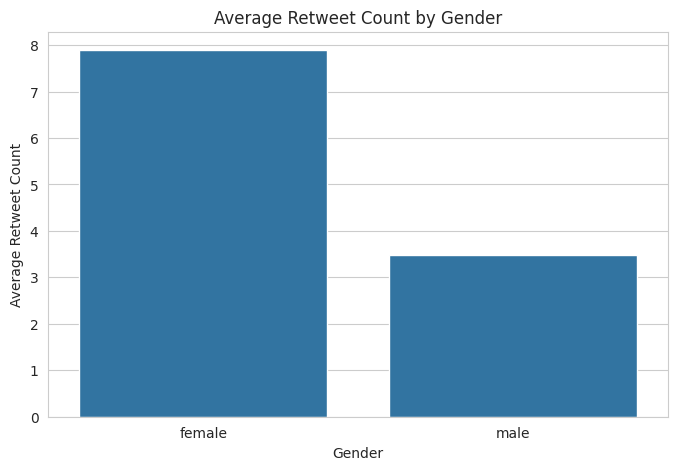

In [ ]:
avg_retweets_by_gender = df.groupby('gender')['retweet_count'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='gender', y='retweet_count', data=avg_retweets_by_gender)
plt.title('Average Retweet Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Retweet Count')
plt.show()


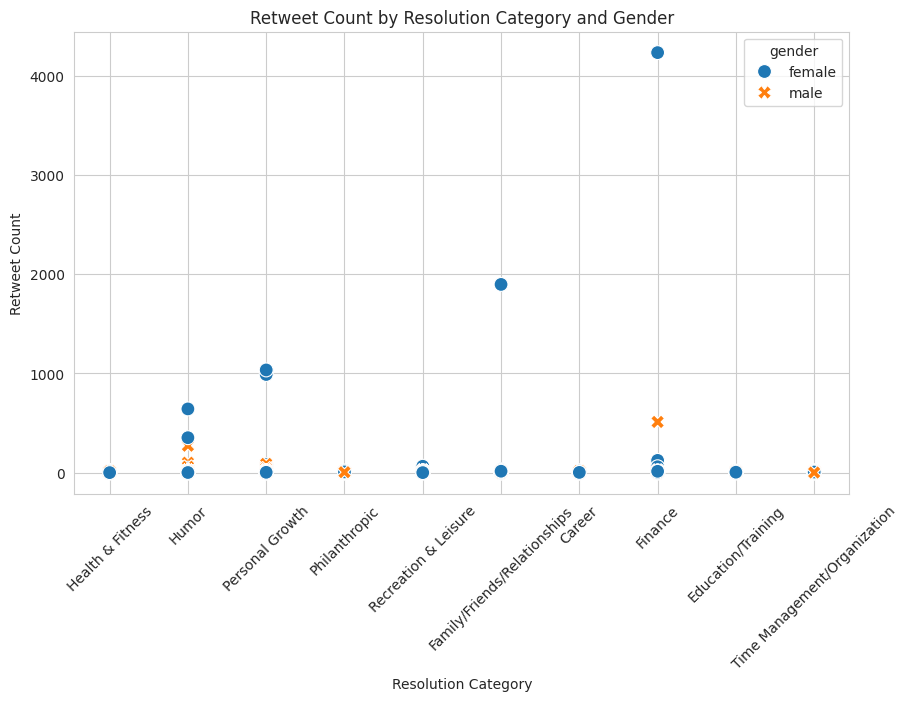

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Resolution_Category', y='retweet_count', data=df, hue='gender', style='gender', s=100)
plt.title('Retweet Count by Resolution Category and Gender')
plt.xticks(rotation=45)
plt.xlabel('Resolution Category')
plt.ylabel('Retweet Count')
plt.show()


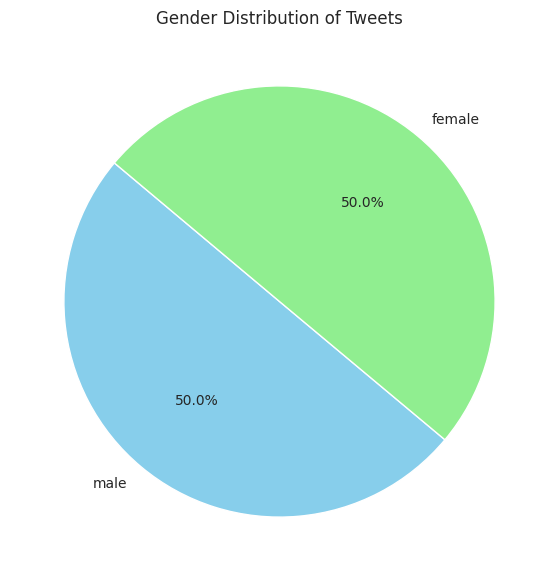

In [ ]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Gender Distribution of Tweets')
plt.show()


In [ ]:
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Set up punctuation and stopwords
punc = string.punctuation
stop_words = set(stopwords.words('english'))

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove links,
    remove punctuation, remove non-ASCII characters, and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)

    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # Remove stopwords
    text = " ".join([word for word in str(text).split() if word not in stop_words])

    # Stemming
    text = " ".join([stemmer.stem(word) for word in text.split()])

    # Lemmatization
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])

    return text

# Apply cleaning function to 'text' column in DataFrame 'data'
df['text'] = df['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df['text']=df['text'].apply(lambda x: remove_emoji(x))

In [ ]:
df.head()

,resolution_topics,gender,name,Resolution_Category,retweet_count,text,tweet_created,tweet_date,tweet_id,tweet_location,tweet_state,tweet_region,latitude,longitude
0,Eat healthier,female,Dena_Marina,Health & Fitness,0.0,newyearsresolut read book scroll fbcheck email...,2014-12-31 10:48:00,2014-12-31,5.500000e+17,Southern California,CA,West,36.7783,-119.4179
1,Humor about Personal Growth and Interests Reso...,female,ninjagirl325,Humor,1.0,newyearsresolut final master part kitchen sink,2014-12-31 10:47:00,2014-12-31,5.500000e+17,New Jersey,NJ,Northeast,40.0583,-74.4057
2,Be More Confident,male,RickyDelReyy,Personal Growth,0.0,newyearsresolut stop damn perf,2014-12-31 10:46:00,2014-12-31,5.500000e+17,Hollywood,CA,West,36.7783,-119.4179
3,Other,male,CalmareNJ,Philanthropic,0.0,newyearsresolut help disabl patient discov emo...,2014-12-31 10:45:00,2014-12-31,5.500000e+17,Metro NYC,NY,Northeast,40.7128,-74.0060
4,Be more positive,female,welovatoyoudemi,Personal Growth,0.0,newyearsresolut continu,2014-12-31 10:44:00,2014-12-31,5.500000e+17,"Pittsburgh, Pennsylvania",PA,Northeast,NaN,NaN


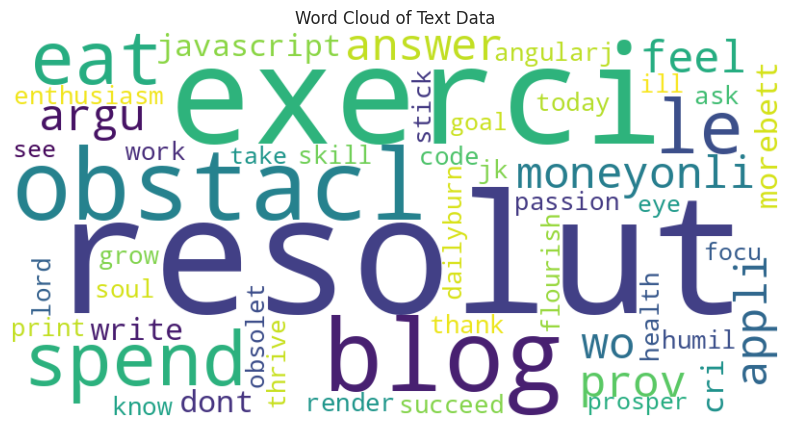

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'text' is the column with the preprocessed text
# Filter out specific words before joining the text
filtered_text = ' '.join(cleaned_text for cleaned_text in df['text']
                         if 'newyearsresolut' not in cleaned_text
                         and 'rt' not in cleaned_text
                         and 'new' not in cleaned_text
                         and 'year' not in cleaned_text
                         and 'next' not in cleaned_text)

# Generate the word cloud with specific parameters for aesthetic purposes
wordcloud = WordCloud(
    max_words=200,         # Limit the number of words to keep the visualization clean
    background_color='white',  # White background for better visibility
    colormap='viridis',    # A visually appealing color map
    width=800,             # Set the width of the canvas
    height=400             # Set the height of the canvas
).generate(filtered_text)

# Create the plot with specific dimensions
plt.figure(figsize=(10, 5))  # Set the size of the figure
plt.imshow(wordcloud, interpolation='bilinear')  # Use bilinear interpolation for smoother appearance
plt.axis('off')  # Turn off the axis, as they are not needed in word cloud visualization
plt.title('Word Cloud of Text Data')  # Optional: add a title to the plot
plt.show()


In [ ]:
# Function to perform sentiment analysis on cleaned tweets
def SentimentChecker(newTweets):
    newDF = pd.DataFrame(columns=['text', 'subjectivity', 'polarity', 'sentiment'])
    for tweet in newTweets:
        blob = TextBlob(tweet)  # Create TextBlob object of a tweet
        pol = blob.sentiment.polarity
        sub = blob.sentiment.subjectivity

        # Categorize sentiment based on polarity
        if pol > 0:
            sentiment = "positive"
        elif pol < 0:
            sentiment = "negative"
        else:
            sentiment = "neutral"

        # Create row for DataFrame
        row = [tweet, sub, pol, sentiment]
        # Add row to DataFrame
        newDF.loc[len(newDF)] = row
    return newDF


In [ ]:
# Function to plot joint plot and sentiment counts
def JointPlotter(newDF):
    # Create joint plot for polarity and subjectivity of twitter tweets.
    sns.jointplot(data=newDF, x="subjectivity", y="polarity", hue="sentiment")
    plt.show()

    # Count sentiment occurrences
    sentimentCounts = pd.DataFrame(newDF["sentiment"].value_counts())
    sentimentCounts = sentimentCounts.rename(columns={'sentiment': 'count'})
    sentimentCounts["sentiment"] = sentimentCounts.index

    # Create barplot of sentiment counts
    sns.barplot(data=sentimentCounts, x="sentiment", y="count")
    plt.show()

In [ ]:
# Function to visualize word cloud and frequency distribution
def visualiser(subset):
    # Create frequency distribution for "subset"
    fdist = nltk.FreqDist()
    for tweet in subset["text"]:
        tweet_tokens = nltk.word_tokenize(tweet)
        for word in tweet_tokens:
            fdist[word] += 1
    fdist.plot(30, cumulative=False)

    # Create word cloud for "subset"
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate_from_frequencies(fdist)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

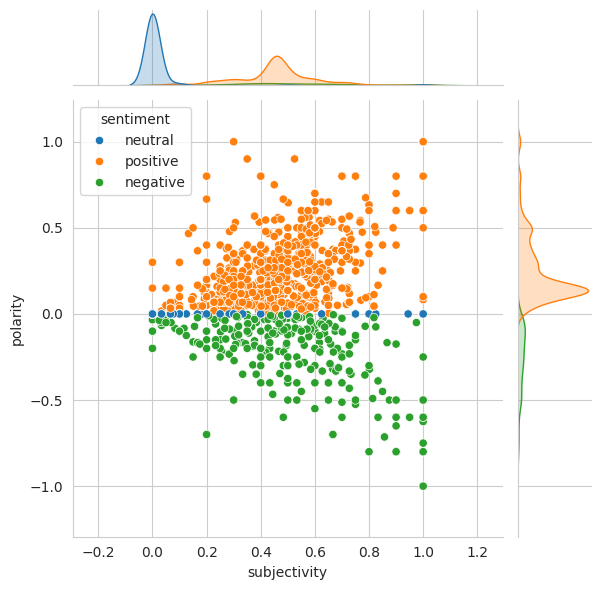

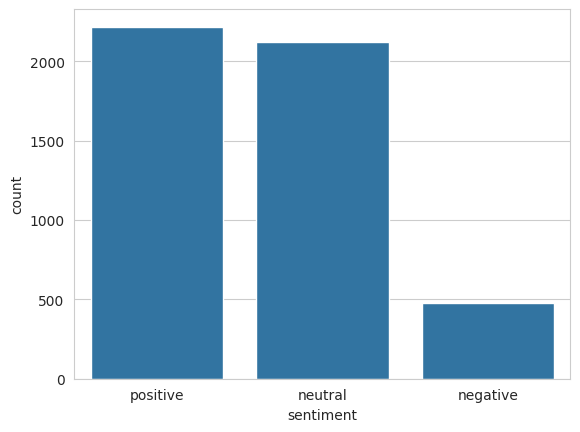

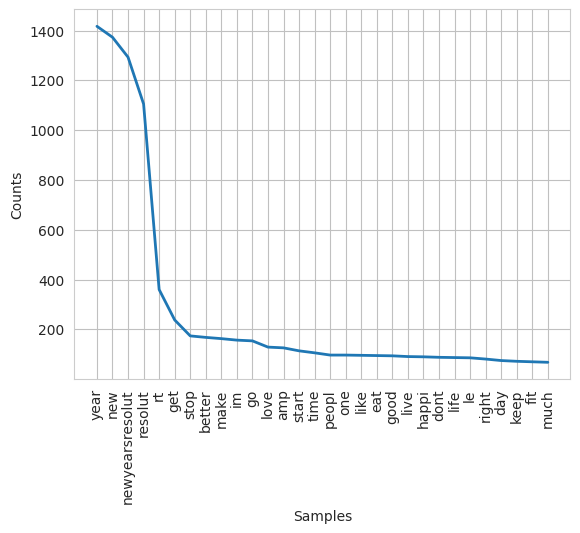

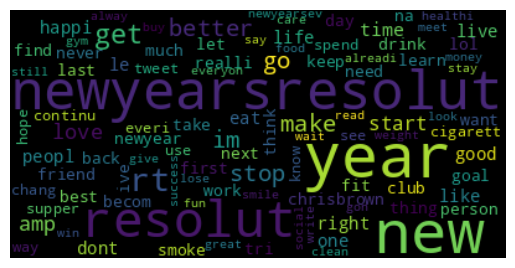

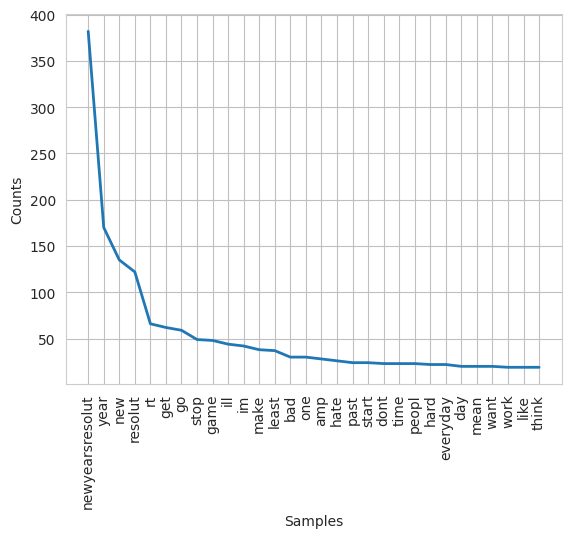

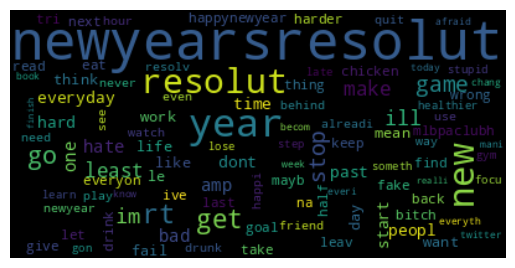

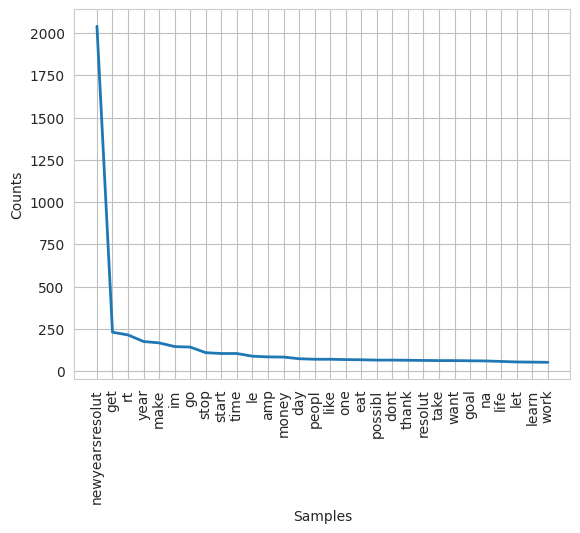

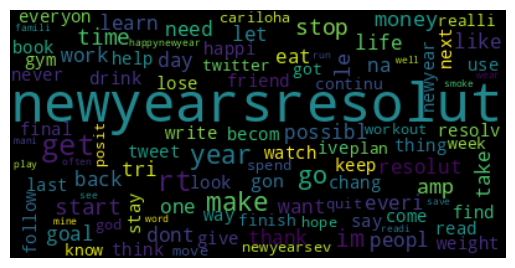

In [ ]:
# Cleaned tweet data from your dataset
cleaned_tweets = df['text']  # Assuming 'text' is the column with cleaned tweets in your dataset

# Perform sentiment analysis on cleaned tweets
sentiment_df = SentimentChecker(cleaned_tweets)

# Visualize sentiment distribution and word frequency distribution
JointPlotter(sentiment_df)

# Plot word clouds and frequency distributions for each sentiment category
for sentiment_category in ["positive", "negative", "neutral"]:
    subset = sentiment_df[sentiment_df["sentiment"] == sentiment_category]
    visualiser(subset)